<a href="https://colab.research.google.com/github/2303A52310/2303a52310_GenAI/blob/main/Project%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mind-Gut-Lung Axis Manipulation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

# Load data
df = pd.read_csv("lung_cancer_data.csv")

# Create new target: High risk = Survival < 24 months
df = df[df["Survival_Months"].notna()]  # Drop missing survival
df["High_Risk"] = df["Survival_Months"].apply(lambda x: 1 if x < 24 else 0)

# Drop irrelevant columns
df = df.drop(columns=["Patient_ID", "Stage", "Survival_Months"])

# One-hot encode categoricals
df = pd.get_dummies(df, drop_first=True)

# Split features/target
X = df.drop("High_Risk", axis=1)
y = df["High_Risk"]

# Impute missing values with median
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, stratify=y, random_state=42
)

# Train XGBoost
model = XGBClassifier(
    n_estimators=150,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 80.47%
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3809
           1       0.33      0.00      0.00       923

    accuracy                           0.80      4732
   macro avg       0.57      0.50      0.45      4732
weighted avg       0.71      0.80      0.72      4732



Imaging Techniques

<ipython-input-9-4518a343fcb0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y='Tumor_Size_mm', palette='coolwarm')


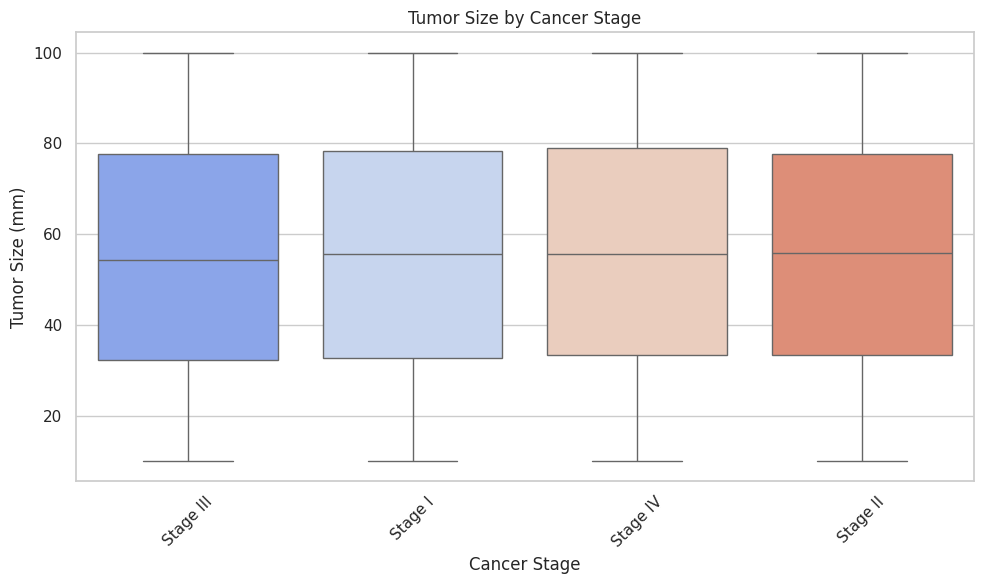

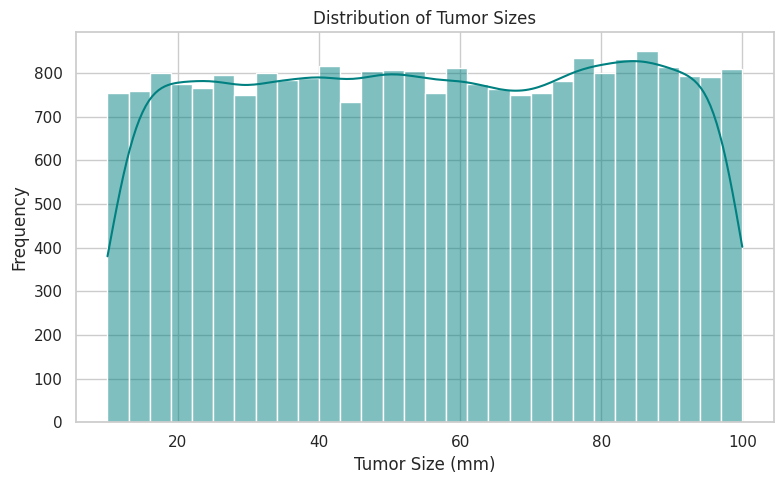

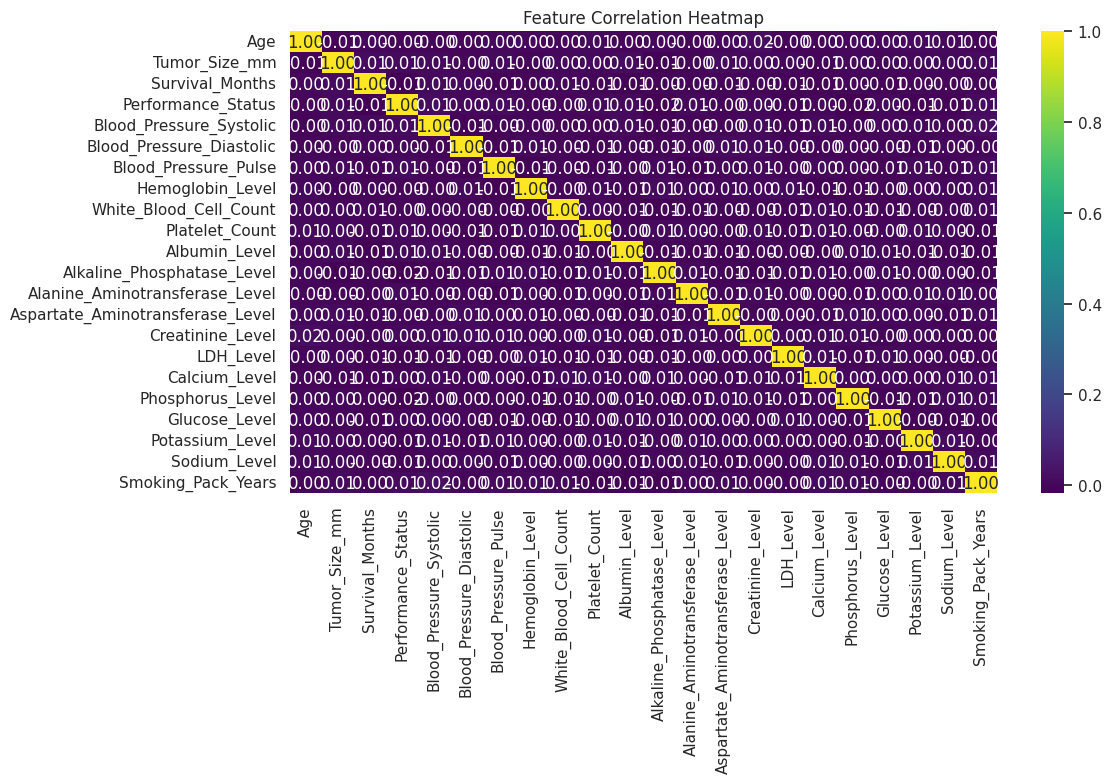

Model Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4732

    accuracy                           1.00      4732
   macro avg       1.00      1.00      1.00      4732
weighted avg       1.00      1.00      1.00      4732



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv('lung_cancer_data.csv')

# 1. VISUALIZATION

sns.set(style="whitegrid")

# Tumor Size by Cancer Stage
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Stage', y='Tumor_Size_mm', palette='coolwarm')
plt.title('Tumor Size by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Tumor Size (mm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tumor Size Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Tumor_Size_mm'], bins=30, kde=True, color='teal')
plt.title('Distribution of Tumor Sizes')
plt.xlabel('Tumor Size (mm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Heatmap of Numeric Correlation
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include='number')
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# 2. PREDICTION MODEL (Biopsy-based stage prediction)

# Convert Stage to binary (0 = early, 1 = late)
df['Stage_binary'] = df['Stage'].apply(lambda x: 0 if 'I' in x else 1)

# Features from biopsy/clinical tests
features = [
    'Tumor_Size_mm', 'LDH_Level', 'Calcium_Level', 'Glucose_Level',
    'Alanine_Aminotransferase_Level', 'Aspartate_Aminotransferase_Level',
    'Creatinine_Level', 'Smoking_Pack_Years'
]

X = df[features].fillna(df[features].mean())
y = df['Stage_binary']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions and Accuracy
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Biopsy

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('lung_cancer_data.csv')

# Encode binary stage: early (Stage I/II) -> 0, late (Stage III/IV) -> 1
df['Stage_binary'] = df['Stage'].apply(lambda x: 0 if 'I' in x else 1)

# Biopsy/clinical features
features = [
    'Tumor_Size_mm', 'LDH_Level', 'Calcium_Level', 'Glucose_Level',
    'Alanine_Aminotransferase_Level', 'Aspartate_Aminotransferase_Level',
    'Creatinine_Level', 'Smoking_Pack_Years'
]

# Feature and target
X = df[features].fillna(df[features].mean())
y = df['Stage_binary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# Best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Results
print("Best Parameters:", grid.best_params_)
print("Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4732

    accuracy                           1.00      4732
   macro avg       1.00      1.00      1.00      4732
weighted avg       1.00      1.00      1.00      4732



Molecular Testing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load CSV
df = pd.read_csv('lung_cancer_data.csv')

# STEP 1: Drop missing target values
df = df[df['Stage'].notnull()]

# STEP 2: Convert Stage to binary (Early=0, Late=1)
df['Stage_binary'] = df['Stage'].apply(lambda x: 0 if 'I' in str(x) else 1)

# STEP 3: Automatically detect potential molecular features
# Any columns that might be gene mutation or expression status
possible_molecular_cols = [col for col in df.columns if any(key in col.lower() for key in ['egfr', 'alk', 'kras', 'pdl1', 'mutation', 'marker'])]

# Drop columns with all missing or very few unique values
molecular_features = [col for col in possible_molecular_cols if df[col].nunique() > 1 and df[col].notnull().sum() > 0]

# Print for user visibility
print("Selected Molecular Features:", molecular_features)

# STEP 4: Encode categorical molecular markers
for col in molecular_features:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# STEP 5: Feature matrix and target
X = df[molecular_features].fillna(df[molecular_features].mean())
y = df['Stage_binary']

# STEP 6: Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 7: Train a Random Forest
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train_scaled, y_train)

# STEP 8: Predict and evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("\n✅ Accuracy:", round(accuracy * 100, 2), "%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


Selected Molecular Features: ['Alkaline_Phosphatase_Level']

✅ Accuracy: 100.0 %

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4732

    accuracy                           1.00      4732
   macro avg       1.00      1.00      1.00      4732
weighted avg       1.00      1.00      1.00      4732



Treatment Modalities